# Big Mart III

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.<br>
The aim is **to build a predictive model and find out the sales of each product at a particular store.**

Using this model, BigMart will try `to understand the properties of products` and `stores which play a key role in increasing sales`.


Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

#### Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

| Variable | Description
| :-------- | :-----------
| **Item_Identifier**| Unique product ID
| **Item_Weight** | Weight of product
| **Item_Fat_Content** | Whether the product is low fat or not
| **Item_Visibility** | The % of total display area of all products in a store allocated to the particular product
| **Item_Type** | The category to which the product belongs
| **Item_MRP** | Maximum Retail Price (list price) of the product
| **Outlet_Identifier** | Unique store ID
| **Outlet_Establishment_Year** | The year in which store was established
| **Outlet_Size** | The size of the store in terms of ground area covered
| **Outlet_Location_Type** | The type of city in which the store is located
| **Outlet_Type** | Whether the outlet is just a grocery store or some sort of supermarket
| **Item_Outlet_Sales** | Sales of the product in the particulat store. This is the outcome variable to be predicted.

#### Evaluation Metric:

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in "SampleSubmission.csv".

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("SampleSubmission.csv")

#### How  should the submission look like?

In [47]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,0
1,FDW14,OUT017,0
2,NCN55,OUT010,0
3,FDQ58,OUT017,0
4,FDY38,OUT027,0


In [48]:
sample.shape

(5681, 3)

___

# The approach

*`reminder, the goal is to build a predictive model and find out the sales of each product at a particular store`*<br>

 - Exploratory Data Analysis
 - Sum-up of next steps
 - Data Cleaning
 - Feature Engineering
 - Model comparison (random forest, fast tree)
 - Sample check
 - Prediction

___

# Exploratory Data Analysis

**What do train.csv and test.csv files contain?**

In [49]:
print("train data shape:", train.shape)
print("test data shape:", test.shape)

train data shape: (8523, 12)
test data shape: (5681, 11)


**Ok, there is one observation of difference between train and test datasets.**

In [50]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**The missing obversation is Item_Outlet_Sales which is not included in test dataset.<br>
<br>Let's simplify by merging these two datasets as we will, later on, split them anyway before implementing the chosen regressor algorithm.**

In [52]:
import warnings
warnings.filterwarnings('ignore')

train['source'] = "train"
test['source'] = "test"

tt = [train, test]
ttdata = pd.concat(tt)
print("train n test dataset shape:", ttdata.shape)
ttdata.head()

train n test dataset shape: (14204, 13)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


### 1. Looking at uniqueness of data.

In [53]:
ttdata.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

`Item_MRP` is a important compare to `Item_Identifier`. There are more prices than products and the latter is relatively large. Is it possible that an item has different prices within one or several outlet?

### 2. Looking at statistic information about the data.

In [54]:
ttdata.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


`'Item_Visibility'` has 0 as a minimum value. It has to be imputed.
Also, age of Outlet will be more relevant instead of 'YEAR'. In other words, 23 years is better to hanlde than 1997.

### 3. Looking at any missing value among data.

In [55]:
ttdata.isnull().sum()/len(train)*100

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            66.654934
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  28.616684
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  47.119559
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

+ 66,7% of `Item_Outlet_Sales` are missing because this observation is not include in the test dataset.
+ 11,5% of `Item_weigh` of missing value have to be imputed.
+ 18,8% of `Outlet_Size` of missing value have to be imputed.

### 4. Checking the categories labelization (for non-numerical) & frequencies.

In [56]:
# ttdata.info()

In [57]:
# gathering only the non-numerical type
cat_col = [cat for cat in ttdata.dtypes.index if ttdata.dtypes[cat]=='object']

# printing the frequencies for each category
for col in cat_col:
    print('\nFrequency of categories within {}'.format(col))
    print(ttdata[col].value_counts())


Frequency of categories within Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of categories within Item_Identifier
FDT43    10
FDC14    10
FDW24    10
DRI11    10
FDT19    10
         ..
NCL42     7
FDL50     7
FDO33     7
FDM50     7
DRN11     7
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of categories within Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of categories within Outlet_Identifier
OU

+ There is heterogeneity in the labelization within `Item_Fat_Content` but with common meaning. Low Fat == low fat == LF, Regular = regular.
+ `Item_Identifier` seems to have recurrent labelization,
+ But, `Item_Type` frequencies is larger than `Item_Identifier`. These two, labelization might need some reduction.
+ Outlet `OUT010` and `OUT019` have almost half less presence than the other.

## Univariate Analysis

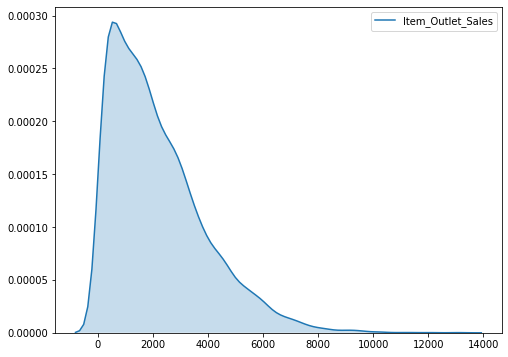

In [58]:
# Target data : Item_Outlet_Sales
plt.figure(figsize=(8,6))
sns.kdeplot(ttdata['Item_Outlet_Sales'], shade = True)

Skewed 'Sales' data to the right.

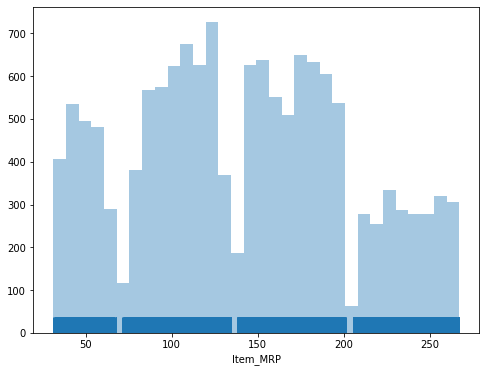

In [59]:
warnings.filterwarnings('ignore')

# Maximum Retail Price (list price) of the product : Item_MRP
plt.figure(figsize=(8,6))
sns.distplot(ttdata['Item_MRP'], kde=False, rug=True);

A distribution with 4 obvious value intervals.
+ ~20 to ~70
+ ~70 to ~140
+ ~140 to ~205
+ ~205 to ~270

## Bivariate analysis

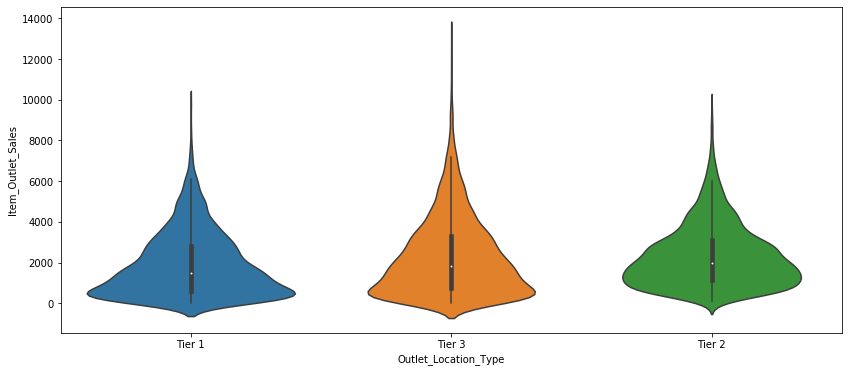

In [60]:
warnings.filterwarnings('ignore')
# Any pattern in the location type of outlet through Sales?

plt.figure(figsize=(14,6))
ty_sales = sns.violinplot(x=ttdata['Outlet_Location_Type'], y=ttdata['Item_Outlet_Sales'])

Location type 1 and 3 have got more or less the same shape.

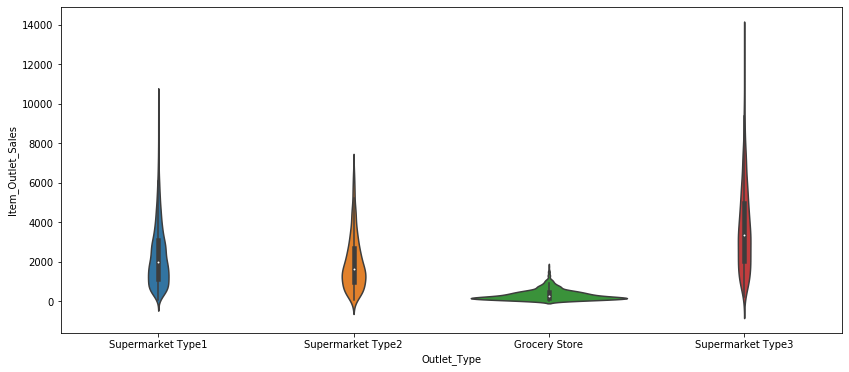

In [61]:
warnings.filterwarnings('ignore')
# Any pattern in the type of outlet through Sales?

plt.figure(figsize=(14,6))
ty_sales = sns.violinplot(x=ttdata['Outlet_Type'], y=ttdata['Item_Outlet_Sales'])

Low value of sales within `Grocery Store`.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

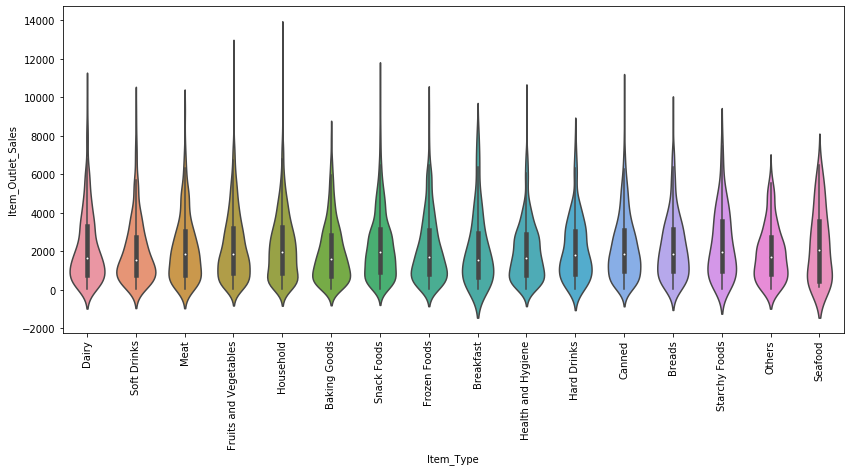

In [62]:
warnings.filterwarnings('ignore')
# Any pattern in the type of items through Sales?

plt.figure(figsize=(14,6))
ty_sales = sns.violinplot(x=ttdata['Item_Type'], y=ttdata['Item_Outlet_Sales']);
plt.xticks(rotation=90)


No much information here. Similar distribution of values among type of items.

___

# Sum-up for next steps

1. `Item_Visibility` == 0 as a minimum value will be imputed.
2. `Item_weight` and `Outlet_Size` missing values will be imputed.
3. Age of outlet will replace `Outlet_Establishment_Year`.  
4. Cleaning `Item_Fat_Content` labelization, eg.: Low Fat == low fat == LF and so on.
5. Perhaps provide homogeneity in `Item_Identifier` labelization. (not mandatory)
6. Perhaps provide homogeneity in `Item_Type` labelization. (not mandatory)
7. Outlet `OUT010` and `OUT019` have almost half less presence than the other.
8. `'Item_Outlet_Sales'`will be drop off the global dataset.
9. Data transformation to unscrewed `Item_Outlet_Sales`.
10. Creation of 4 levels of value from `Item_MRP` distributed.

___

# Homogenization and cleaning of the data

### 1. Item_Visibility == 0 as a minimum value will be imputed.

In [63]:
# diving into Item_Visibility distribution.
ttdata['Item_Visibility'].value_counts().head()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
Name: Item_Visibility, dtype: int64

In [64]:
# replace the 0 by NaN value and check that entries have been replaced.
# ttdata['Item_Visibility'] = ttdata['Item_Visibility'].replace({0:np.nan})
ttdata['Item_Visibility'].fillna(ttdata['Item_Visibility'].median(), inplace=True)
ttdata['Item_Visibility'].value_counts().head()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
Name: Item_Visibility, dtype: int64

### 2. Replacing `Item_Weight`, `Outlet_Size` missing value.

In [65]:
ttdata['Item_Weight'].fillna(ttdata['Item_Weight'].median(), inplace=True) # replace with median
ttdata['Outlet_Size'].fillna(ttdata['Outlet_Size'].mode()[0], inplace=True) # replace with the more occured data, here "medium"

### 3. Age of outlet replaces `Outlet_Establishment_Year` as `Outlet_Age`.

In [66]:
import datetime

today = datetime.datetime.now()
age = today.year - ttdata['Outlet_Establishment_Year']
ttdata['Outlet_Age'] = age

ttdata = ttdata.drop(['Outlet_Establishment_Year'], axis = 1)
ttdata.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Age
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,train,21
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,train,11
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,train,21
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,OUT010,Tier 3,Medium,Grocery Store,train,22
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,OUT013,Tier 3,High,Supermarket Type1,train,33


### 4. Cleaning `Item_Fat_Content` labelization, eg.: Low Fat == low fat == LF and so on.

In [67]:
# recall that we have parsed nomination Low Fat, low fat, LF for Low Fat and Regular, reg for Regular.
ttdata['Item_Fat_Content'] = ttdata['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

# checking of the replacement.
print(ttdata['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


**Ckecking of any missing value.**

In [68]:
ttdata.isnull().sum()/len(ttdata)*100

Item_Fat_Content         0.000000
Item_Identifier          0.000000
Item_MRP                 0.000000
Item_Outlet_Sales       39.995776
Item_Type                0.000000
Item_Visibility          0.000000
Item_Weight              0.000000
Outlet_Identifier        0.000000
Outlet_Location_Type     0.000000
Outlet_Size              0.000000
Outlet_Type              0.000000
source                   0.000000
Outlet_Age               0.000000
dtype: float64

In [69]:
# ttdata.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

#### Having a look on distribution of numeric items and correlation between them.

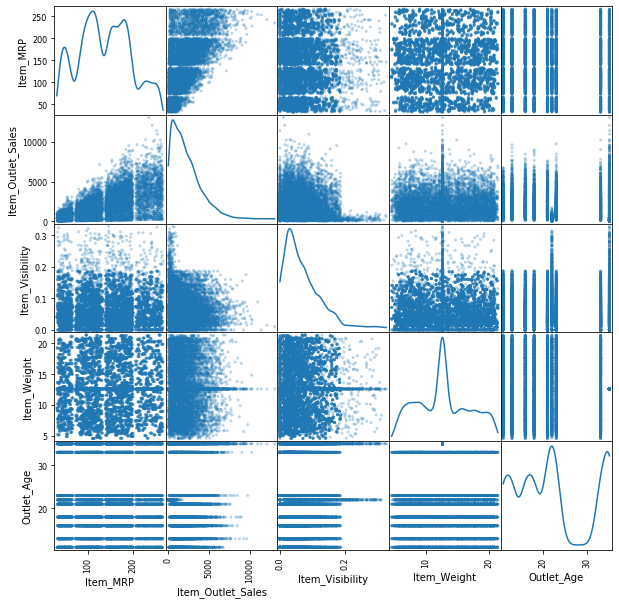

In [70]:
from pandas.plotting import scatter_matrix

scatter_matrix(ttdata, alpha = 0.3, figsize = (10,10), diagonal = 'kde');

Based on "Item_Outlet_Sales" fluctuation,
+ "Item_MRP" *(Maximum Retail Price (list price) of the product))* looks like to have changing density regarding level of sales;
+ The year at which the store has been established provides light indications (see "Outlet_Establishment_Year"). It might bring some granularity information later on.

___

# Feature engineering

### Quantity of product sold by Item_Identifier.

In [71]:
#ttdata['Item_Volume']= (ttdata['Item_Outlet_Sales']/ttdata['Item_MRP'])
#ttdata.head()

### Item Identifier and Type labelization.
+ Provide homogeneity in Item_Type labelization,
+ Provide homogeneity in Item_Identifier labelization.

In [72]:
# 1559 Identifiers dispatch among 16 Types.

ttdata.loc[:,['Item_Identifier', 'Item_Type']].head(5)

,Item_Identifier,Item_Type
0,FDA15,Dairy
1,DRC01,Soft Drinks
2,FDN15,Meat
3,FDX07,Fruits and Vegetables
4,NCD19,Household


When it's about food (dairy, meat, fruit, ...) the ID is compouned with 'FD' letter. Drinks with 'DR' and non edible NC (probably for non-consumable).

In [73]:
# let rationalized this identification type.

# 1st gathering 2 letters related to type of item: FD, DR and NC
# and creates a new 'Item_typeID' feature.
ttdata['Item_typeID'] = ttdata['Item_Identifier'].apply(lambda x: x[0:2])

# Make it easier to read by renaming these acronymes.
ttdata['Item_typeID'] = ttdata['Item_typeID'].replace({'FD': 'Food', 'DR': 'Drink', 'NC': 'Non-Consumable'})

# Checking the volume of each new type_ID
ttdata['Item_typeID'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_typeID, dtype: int64

In [74]:
# But wait! We have 14 204 item categorized into 3 different type of items but only 2 different fat_content.
# Let have a little check if not missing any weird conflict.

ttdata.loc[:,['Item_typeID', 'Item_Fat_Content']].head(5)

,Item_typeID,Item_Fat_Content
0,Food,Low Fat
1,Drink,Regular
2,Food,Low Fat
3,Food,Regular
4,Non-Consumable,Low Fat


Here it is : `Non-Consumable` type with a `Low Fat` observation. We have to clean this.

In [75]:
# replacing 'Low Fat' observation for each 'Non-Consumable' observation.
ttdata.loc[ttdata['Item_typeID']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"

# checking of the replacement.
print(ttdata['Item_Fat_Content'].value_counts())

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64


In [76]:
ttdata.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source',
       'Outlet_Age', 'Item_typeID'],
      dtype='object')

## Label Encoding and One Hot Coding

In [77]:
# 1st of all, encoding the non-numerical categories that "accept" ordinal hierarchie with Label Encoder
# Outlet ID and then the others
from sklearn.preprocessing import LabelEncoder
import copy

ttdata_new = ttdata.copy()
# Outlet ID
labEn = LabelEncoder()
ttdata_new['Outlet_ID'] = labEn.fit_transform(ttdata_new['Outlet_Identifier'])

# Other non-numerical categories
ord_var = ['Item_Fat_Content', 'Outlet_ID','Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_typeID']
le = LabelEncoder()
for i in ord_var:
    ttdata_new[i] = le.fit_transform(ttdata_new[i])

In [78]:
# 2nd of all, encoding the non-numerical categories that "accept" cardinal with One-Hot Coding.

car_var = ['Item_Fat_Content', 'Outlet_ID','Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_typeID']
ttdata_new = pd.get_dummies(ttdata_new, columns = car_var)

In [79]:
ttdata_new.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,source,Outlet_Age,Item_Fat_Content_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_typeID_0,Item_typeID_1,Item_typeID_2
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,train,21,1,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,train,11,0,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,train,21,1,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,OUT010,train,22,0,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,OUT013,train,33,0,...,1,0,0,0,1,0,0,0,0,1


In [80]:
print(ttdata_new.shape,'\n', ttdata_new.dtypes)

(14204, 35) 
 Item_Identifier            object
Item_MRP                  float64
Item_Outlet_Sales         float64
Item_Type                  object
Item_Visibility           float64
Item_Weight               float64
Outlet_Identifier          object
source                     object
Outlet_Age                  int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Fat_Content_2          uint8
Outlet_ID_0                 uint8
Outlet_ID_1                 uint8
Outlet_ID_2                 uint8
Outlet_ID_3                 uint8
Outlet_ID_4                 uint8
Outlet_ID_5                 uint8
Outlet_ID_6                 uint8
Outlet_ID_7                 uint8
Outlet_ID_8                 uint8
Outlet_ID_9                 uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Outlet_Type_0               uint8


___

# Implementation

### Generating two datasets: train and test.

In [81]:
# eliminating of Item_Type (Dairy, ...) as we have already replace it with Item_TypeID (FD, DR, NC)

ttdata_new = ttdata_new.drop(['Item_Type'], axis = 1)
# ttdata_new.head()

# split the train and test
train = ttdata_new.loc[ttdata_new['source'] == 'train']
test = ttdata_new.loc[ttdata_new['source'] == 'test']

# cleaning some columns respectively to train and test
train = train.drop(['source'], axis = 1)
test = test.drop(['Item_Outlet_Sales', 'source'], axis = 1)

In [82]:
# train.info()

Normalization of data (features).

In [83]:
import warnings
warnings.filterwarnings('ignore')

# Normalizing Numerical features
from sklearn.preprocessing import MinMaxScaler

# initialize a scaler, apply it to features_raw
scaler = MinMaxScaler() # default=(0,1)
numerical = ['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Outlet_Age']

train = pd.DataFrame(data = train)
train[numerical] = scaler.fit_transform(train[numerical])

In [85]:
#test.head()

In [86]:
# save these dataset as .csv files
train.to_csv('train_ready', index = False)
test.to_csv('test_ready', index = False)

### Model

In [94]:
from sklearn.metrics import r2_score, mean_squared_error

# compute the performance score between true and predicted values.
def perfmetric(y_true, y_pred):
    score = r2_score(y_true, y_pred)
    return score

In [97]:
import sys
# from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from math import sqrt
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import GridSearchCV

# input and sales
IDio = ['Item_Identifier', 'Outlet_Identifier']
sales = 'Item_Outlet_Sales'

predictors = [x for x in train.columns if x not in [sales]+IDio]
model = RandomForestRegressor(n_estimators=800,n_jobs=-1)

# fit the chosen algorithm on train data
model = model.fit(train[predictors], train[sales])

# prediction from train dataset predictors
train_pred = model.predict(train[predictors])

# getting r2 score to a scoring function using 'make_scorer' 
# score = make_scorer(perfmetric(train[sales], train_pred))
rscore = perfmetric(train[sales], train_pred)
rmse = sqrt(mean_squared_error(train[sales], train_pred))

# prediction from test dataset predictors
test[sales] = model.predict(test[predictors])

# submission file
IDio.append(sales)
submission = pd.DataFrame({col: test[col] for col in IDio})
submission.to_csv('submission_mh', index = False)

print("R2_score: {}, RMSE: {}\r".format(rscore, rmse))
sys.stdout.flush()

R2_score: 0.9407232611903871, RMSE: 415.4539253589098


### [WIP]

In [ ]:
def reg_model(model, dtrain, dtest, predictors, sales, IDio):

    # fit the chosen algorithm on train data
    model = model.fit(dtrain[predictors], dtrain[sales])

    # prediction from train dataset predictors
    train_pred = model.predict(dtrain[predictors])

    # getting r2 score to a scoring function using 'make_scorer' 
    score = make_scorer(perfmetric(dtrain[sales], train_pred))
    
    # prediction from test dataset predictors
    dtest[sales] = model.predict(dtest[predictors])
    
    # submission file
    IDio.append(sales)
    submission = pd.DataFrame({col: dtest[col] for col in IDio})
    submission.to_csv('submission_mh', index = False)
    return score

In [47]:
model = RandomForestRegressor()
predictors = [x for x in train.columns if x not in [sales]+IDio]
reg_model = reg_model(model, train, test, predictors, sales, IDio)
print("{}\r".format(reg_model))
# sys.stdout.flush()

NameError: name 'reg_model' is not defined